<a href="https://colab.research.google.com/github/baznamit/Lung-Cancer-Detection/blob/main/Lung%20Cancer%20Detection%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from google.colab import files
import io
from tensorflow.keras import layers
from matplotlib import pyplot as plt
u = files.upload()
a= pd.read_csv(io.BytesIO(u['training_data.csv']))
b= pd.read_csv(io.BytesIO(u['testing_data.csv']))

Saving training_data.csv to training_data.csv
Saving testing_data.csv to testing_data.csv


In [ ]:
a = a.reindex(np.random.permutation(a.index))
b= b.reindex(np.random.permutation(b.index))
def change(x):
        if x=='High': return 1
        if x=='Medium':   return 0.5
        if x=='Low':   return 0
a['Level'] = a['Level'].apply(change)
a['Level'] = pd.to_numeric(a['Level'])
def changes(x):
        if x=='High': return 1
        if x=='Medium':   return 0.5
        if x=='Low':   return 0
b['Level'] = b['Level'].apply(changes)
b['Level'] = pd.to_numeric(b['Level'])

In [ ]:
#a['Obesity'] = a['Obesity'].astype('float')
#a['Coughing of Blood'] = a['Coughing of Blood'].astype('float')

In [ ]:
a.dtypes

Patient Id                   object
Age                           int64
Gender                        int64
Air Pollution                 int64
Alcohol use                   int64
Dust Allergy                  int64
OccuPational Hazards          int64
Genetic Risk                  int64
chronic Lung Disease          int64
Balanced Diet                 int64
Obesity                       int64
Smoking                       int64
Passive Smoker                int64
Chest Pain                    int64
Coughing of Blood             int64
Fatigue                       int64
Weight Loss                   int64
Shortness of Breath           int64
Wheezing                      int64
Swallowing Difficulty         int64
Clubbing of Finger Nails      int64
Frequent Cold                 int64
Dry Cough                     int64
Snoring                       int64
Level                       float64
dtype: object

In [ ]:
def build_model(my_learning_rate):
   model = tf.keras.models.Sequential()
   model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
   model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
   return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size):
    history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs)
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    return trained_weight, trained_bias, epochs, rmse, hist  
print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [ ]:
from matplotlib import pyplot as plt
def plot_the_model(trained_weight, trained_bias, feature, label):
  plt.xlabel(feature)
  plt.ylabel(label)
  random_examples = a.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()
def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 11.2032 - root_mean_squared_error: 3.3471
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 9.4513 - root_mean_squared_error: 3.0743
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 8.2856 - root_mean_squared_error: 2.8785
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 7.2903 - root_mean_squared_error: 2.7001
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 6.4255 - root_mean_squared_error: 2.5349
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 5.6373 - root_mean_squared_error: 2.3743
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 4.9113 - root_mean_squared_error: 2.2162
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 4.2633 - root_mean_squared_error: 2.0648
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 3.6465 - root_mean_squared_error

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


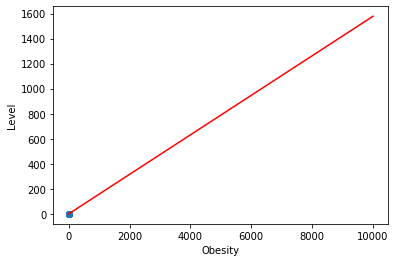

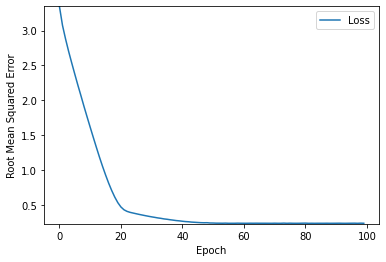

Defined the plot_curve function.


In [ ]:
learning_rate = 0.005
epochs = 100
batch_size = 150
my_feature= "Obesity"
e = a.reindex(np.random.permutation(a.index))  
my_label="Level" 
my_model = None
my_model = build_model(learning_rate)
weight, bias, epochs, rmse, hist = train_model(my_model, e, 
                                         my_feature, my_label,
                                         epochs, batch_size)
print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

print("Defined the plot_curve function.")

In [ ]:
def predict(n, feature, label):
  batch = b[feature][0:0 +n]
  predicted_values = my_model.predict_on_batch(x=batch)
  print("Patient Id     Level")
  print("--------------------------------------")
  for i in range(n):
    if(predicted_values[i][0]>=0 and predicted_values[i][0]<=0.3):
      print (b.at[i,"Patient Id"], "           ","Low" )  
    if(predicted_values[i][0]>=0.4 and predicted_values[i][0]<=0.6):
      print (b.at[i,"Patient Id"], "           ","Medium" )  
    if(predicted_values[i][0]>=0.7 and predicted_values[i][0]<=1):
      print (b.at[i,"Patient Id"], "           ","High" )  

In [ ]:
predict(201, my_feature, my_label)

Patient Id     Level
--------------------------------------
P82             Low
P820             Low
P821             Medium
P822             High
P823             High
P824             Low
P825             Medium
P826             High
P827             Low
P828             Low
P829             Medium
P83             Medium
P830             Medium
P831             Low
P832             High
P833             High
P834             Low
P835             High
P836             Medium
P837             Low
P839             Low
P84             Medium
P840             Low
P841             High
P842             High
P843             Low
P844             High
P845             Low
P846             Low
P847             High
P848             High
P849             High
P85             Low
P850             High
P851             High
P852             High
P853             Low
P854             Medium
P855             Low
P856             High
P857             Low
P858             Low
P859             High


In [ ]:
pip install Flask